In [141]:
#Kaikki notebookissa tarvittavat importit

import pandas as pd
import numpy as np
from math import radians, cos, sin, asin, sqrt
import folium 
import matplotlib.pyplot as plt

In [142]:
#Importataan data ja nimetään molemmat erikseen
#Tulostetaan vielä varalta ja tarkistetaan että data on oikeanlaista

data = pd.read_csv('GPS_data.csv')
display(data.head())
data2 = pd.read_csv('Acceleration_data.csv')
display(data2.head())

,Unnamed: 0,seconds_elapsed,longitude,latitude
0,0,3.703666,25.516165,65.071375
1,1,5.339879,25.516227,65.071393
2,2,5.680000,25.516240,65.071398
3,3,6.311351,25.516264,65.071394
4,4,7.323929,25.516267,65.071396


,Unnamed: 0,seconds_elapsed,z,y,x
0,0,0.143440,-2.846008,-0.581977,-0.468246
1,1,0.159217,-2.651466,-0.560432,-0.418557
2,2,0.175117,-2.132024,-0.366186,-0.535990
3,3,0.190986,-1.023350,-0.041039,-0.522485
4,4,0.206763,-0.449766,0.229015,-0.356920


In [143]:
#Tulostetaan karttakuva ja tallenetaan se html tiedostona

location_frame = data[['latitude','longitude']]
location_list = location_frame.values.tolist() 
ave_lat = np.mean(location_list,axis = 0)[0]
ave_lon = np.mean(location_list,axis = 0)[1]
my_map = folium.Map(location=[ave_lat, ave_lon], zoom_start=14)
folium.PolyLine(location_list, color="red", weight=2.5, opacity=1).add_to(my_map)
my_map.save("projmapwithline.html")

In [144]:
#Muodostetaan haverisnen kaava

def haversine(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 
    return c * r 

In [145]:
#Lasketaan nopeus ja etäisyys ja tulostetaan

lat = data['latitude'] 
lon = data['longitude'] 
data['dist'] = np.zeros(lat.shape[0]) 
data['time_diff'] = np.zeros(lat.shape[0]) 
for i in range(lat.shape[0]-1):
    data.loc[i, 'dist'] = haversine(lon[i], lat[i],lon[i+1], lat[i+1])*1000 
    data.loc[i, 'time_diff'] = data['seconds_elapsed'][i+1] - data['seconds_elapsed'][i] 
    
data.loc[0, 'dist'] = 0
data['velocity'] = data['dist']/data['time_diff']
data.head()


,Unnamed: 0,seconds_elapsed,longitude,latitude,dist,time_diff,velocity
0,0,3.703666,25.516165,65.071375,0.000000,1.636214,0.000000
1,1,5.339879,25.516227,65.071393,0.810401,0.340121,2.382686
2,2,5.680000,25.516240,65.071398,1.171329,0.631351,1.855274
3,3,6.311351,25.516264,65.071394,0.229699,1.012578,0.226845
4,4,7.323929,25.516267,65.071396,0.722069,1.005767,0.717928


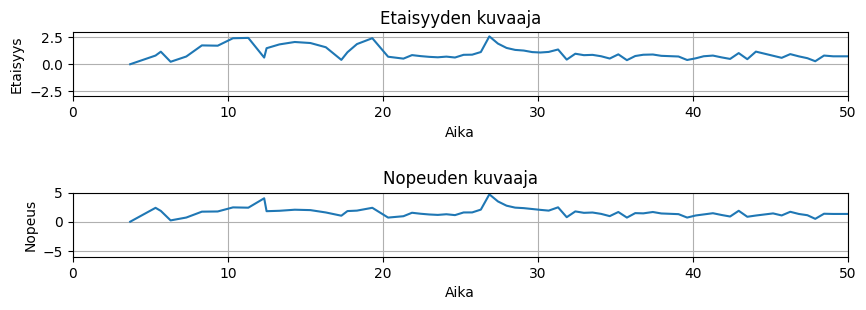

In [146]:
#Piirretään kuvaajat etäisyydelle ja nopeudelle

fig = plt.figure(num=None, figsize= (10, 5),dpi=100, facecolor='w', edgecolor='k')

plt.subplot(3,1,1)
plt.plot(data.seconds_elapsed,data.dist)
plt.title('Etaisyyden kuvaaja')
plt.grid()
plt.xlabel('Aika')
plt.ylabel('Etaisyys')
plt.axis([0,50,-3,3])

plt.subplot(3,1,2)
plt.plot(data.seconds_elapsed,data.velocity)
plt.title('Nopeuden kuvaaja')
plt.grid()
plt.xlabel('Aika')
plt.ylabel('Nopeus')
plt.axis([0,50,-6,5])

plt.subplots_adjust(hspace=1.5)

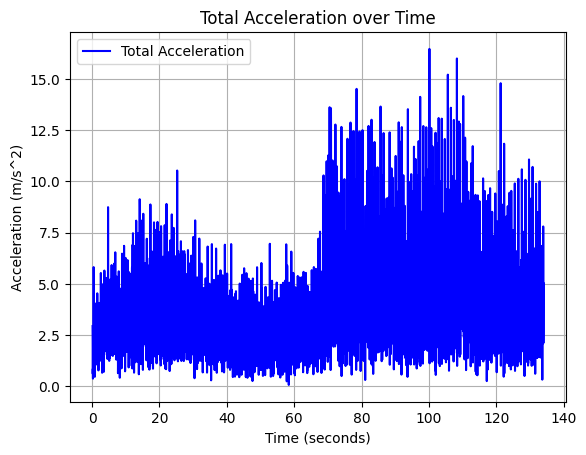

In [147]:
#Esitetään kiihtyvyyden kuvaajat kolmesta komponentista (x,y,z) havaittu ja nopeudesta (velocity) laskettu

#Tässä kuvaajassa näkyy kolmesta komponentista havaittu kiihtyvyys yhdessä kuvaajassa

data2['total_acceleration'] = np.sqrt(data2['x']**2 + data2['y']**2 + data2['z']**2)

plt.plot(data2['seconds_elapsed'], data2['total_acceleration'], color='blue', label='Total Acceleration')
plt.xlabel('Time (seconds)')
plt.ylabel('Acceleration (m/s^2)')
plt.title('Total Acceleration over Time')
plt.legend()
plt.grid(True)
plt.show()

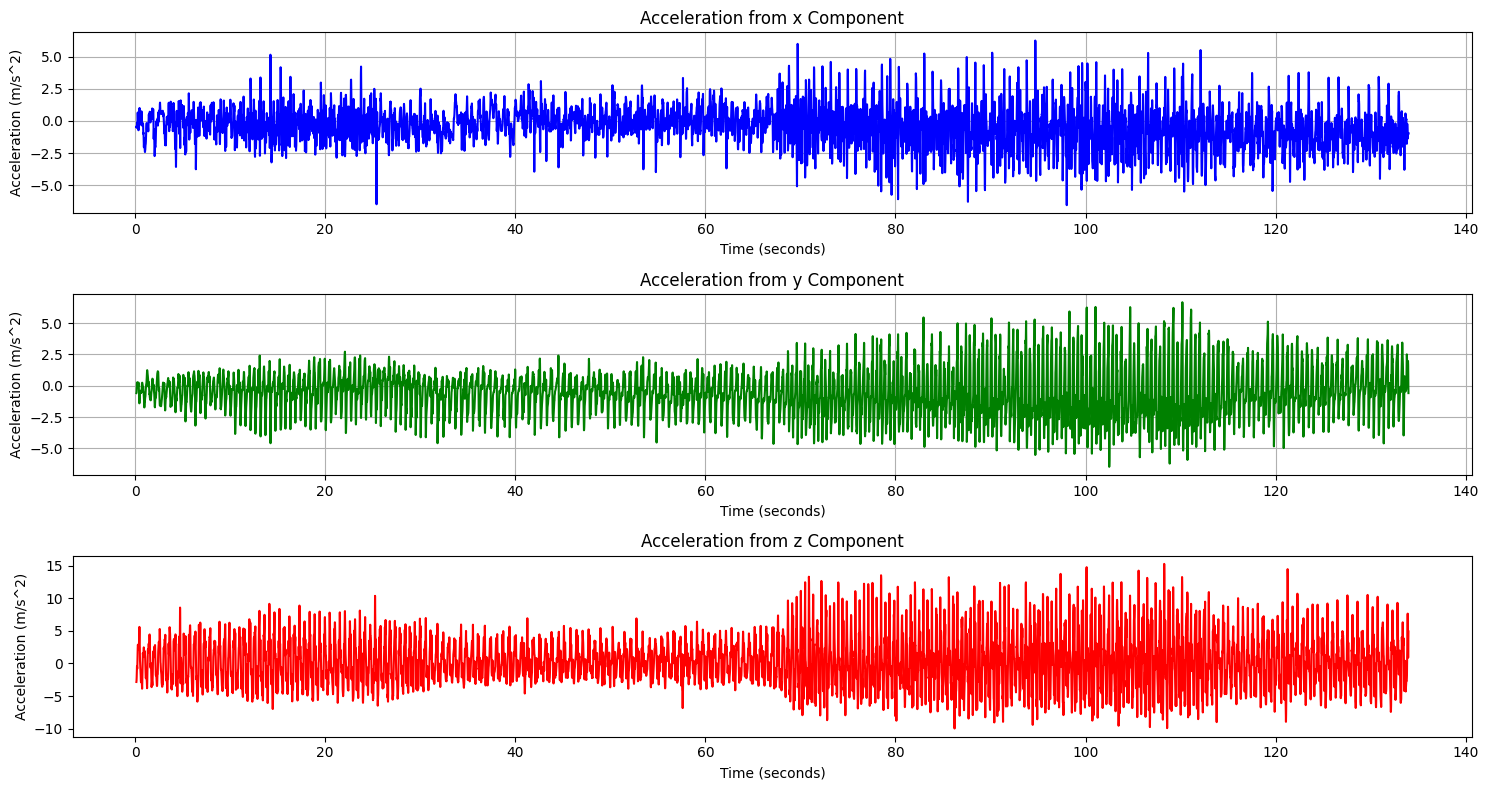

In [148]:
#Piirretään vielä kolmesta komponentista havaitut kiihtyvyydet erikseen omina kuvaajinaan
plt.figure(figsize=(15, 8))

# Kiihtyvyys x komponentista
plt.subplot(3, 1, 1)
plt.plot(data2['seconds_elapsed'], data2['x'], color='blue')
plt.grid()
plt.xlabel('Time (seconds)')
plt.ylabel('Acceleration (m/s^2)')
plt.title('Acceleration from x Component')

# Kiihtyvyys y komponentista
plt.subplot(3, 1, 2)
plt.plot(data2['seconds_elapsed'], data2['y'], color='green')
plt.grid()
plt.xlabel('Time (seconds)')
plt.ylabel('Acceleration (m/s^2)')
plt.title('Acceleration from y Component')

# Acceleration from z component
plt.subplot(3, 1, 3)
plt.plot(data2['seconds_elapsed'], data2['z'], color='red')
plt.grid
plt.xlabel('Time (seconds)')
plt.ylabel('Acceleration (m/s^2)')
plt.title('Acceleration from z Component')

plt.tight_layout()
plt.show()

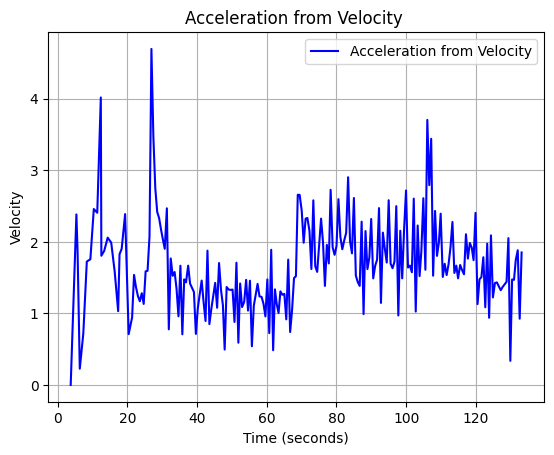

In [149]:
#Seuraavaksi nopeudesta laskettu kiihtyvyys

plt.plot(data['seconds_elapsed'], data['velocity'], color='blue', label='Acceleration from Velocity')
plt.xlabel('Time (seconds)')
plt.ylabel('Velocity')
plt.title('Acceleration from Velocity ')
plt.legend()
plt.grid(True)
plt.show()

In [150]:
#Lasketaan keskinopeus numerona

average_speed = data['velocity'].mean()
formatted_average_speed = "{:.1f}".format(average_speed)
print("Average Speed (m/s):", formatted_average_speed)

Average Speed (m/s): 1.7


In [151]:
#Lasketaan kuljettu matka numerona

total_distance = data['dist'].sum()
formatted_total_distance = "{:.2f}".format(total_distance)
print("Total Distance Traveled (m):", formatted_total_distance)

Total Distance Traveled (m): 215.14


In [152]:
#Seuraavaksi suodatetaan kiiihtyvyysdata jotta voimme piirtää tästä kuvaajan ja laskea askelmäärän

#Tässä solussa valmiit filtterit datan suodatusta varten

from scipy.signal import butter,filtfilt

def butter_lowpass_filter(data, cutoff, fs, nyq, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

def butter_highpass_filter(data, cutoff, fs, nyq, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    y = filtfilt(b, a, data)
    return y

Askelmäärä on  0
Askelmäärä on  0
Askelmäärä on  0
Askelmäärä on  0
Askelmäärä on  0
Askelmäärä on  0
Askelmäärä on  0
Askelmäärä on  0
Askelmäärä on  0
Askelmäärä on  0
Askelmäärä on  0
Askelmäärä on  0
Askelmäärä on  0
Askelmäärä on  0
Askelmäärä on  0
Askelmäärä on  0
Askelmäärä on  0
Askelmäärä on  0
Askelmäärä on  0
Askelmäärä on  0
Askelmäärä on  0
Askelmäärä on  0
Askelmäärä on  0
Askelmäärä on  0
Askelmäärä on  0
Askelmäärä on  0
Askelmäärä on  0
Askelmäärä on  0
Askelmäärä on  0
Askelmäärä on  0
Askelmäärä on  0
Askelmäärä on  0
Askelmäärä on  0
Askelmäärä on  0
Askelmäärä on  0
Askelmäärä on  0
Askelmäärä on  0
Askelmäärä on  0
Askelmäärä on  0
Askelmäärä on  0
Askelmäärä on  0
Askelmäärä on  0
Askelmäärä on  0
Askelmäärä on  0.5
Askelmäärä on  0.5
Askelmäärä on  0.5
Askelmäärä on  0.5
Askelmäärä on  0.5
Askelmäärä on  0.5
Askelmäärä on  0.5
Askelmäärä on  0.5
Askelmäärä on  0.5
Askelmäärä on  0.5
Askelmäärä on  0.5
Askelmäärä on  0.5
Askelmäärä on  0.5
Askelmäärä on  0.5
Ask

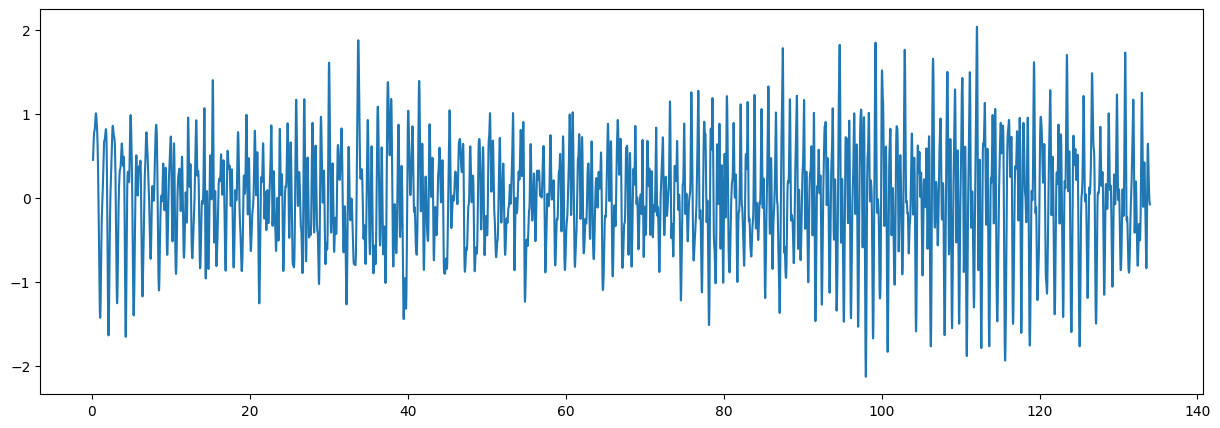

In [153]:
#Suodatetaan kiihtyvyysdata askelmäärän laskemista varten

#Voidaan huvin vuoksi suodattaa kaikki kaikki komponentit erikseen mutta valitaan kuitenkin lopuksi vain yksi

#Komponentti x
time = data2['seconds_elapsed']
noisy_signal = data2['x']
cutoff_H = 1/0.4 
cutoff_L = 1/5 
order = 2
dt = (time[len(time)-1 ] - time[1])/len(time) 
fs = 1/dt 
nyq = 0.5 * fs
lowpass_filtered = butter_lowpass_filter(noisy_signal, cutoff_L, fs, nyq, order)
highpass_filtered = butter_highpass_filter(noisy_signal, cutoff_H, fs, nyq, order)
clean_signal = noisy_signal -lowpass_filtered - highpass_filtered

plt.figure(figsize = (15,5))
plt.plot(time,clean_signal)

stepdata= clean_signal
steps = 0
for i in range(stepdata.shape[0]-1):
    if stepdata[i]/stepdata[i+1] < 0:
        steps += 0.5
    print('Askelmäärä on ', steps)

Askelmäärä on  0
Askelmäärä on  0
Askelmäärä on  0
Askelmäärä on  0
Askelmäärä on  0
Askelmäärä on  0
Askelmäärä on  0
Askelmäärä on  0
Askelmäärä on  0
Askelmäärä on  0
Askelmäärä on  0
Askelmäärä on  0
Askelmäärä on  0
Askelmäärä on  0
Askelmäärä on  0
Askelmäärä on  0
Askelmäärä on  0
Askelmäärä on  0
Askelmäärä on  0
Askelmäärä on  0.5
Askelmäärä on  0.5
Askelmäärä on  0.5
Askelmäärä on  0.5
Askelmäärä on  0.5
Askelmäärä on  0.5
Askelmäärä on  0.5
Askelmäärä on  0.5
Askelmäärä on  1.0
Askelmäärä on  1.0
Askelmäärä on  1.0
Askelmäärä on  1.0
Askelmäärä on  1.0
Askelmäärä on  1.0
Askelmäärä on  1.0
Askelmäärä on  1.0
Askelmäärä on  1.0
Askelmäärä on  1.0
Askelmäärä on  1.0
Askelmäärä on  1.0
Askelmäärä on  1.0
Askelmäärä on  1.0
Askelmäärä on  1.0
Askelmäärä on  1.0
Askelmäärä on  1.0
Askelmäärä on  1.0
Askelmäärä on  1.0
Askelmäärä on  1.5
Askelmäärä on  1.5
Askelmäärä on  1.5
Askelmäärä on  1.5
Askelmäärä on  1.5
Askelmäärä on  1.5
Askelmäärä on  1.5
Askelmäärä on  1.5
Askelmäärä o

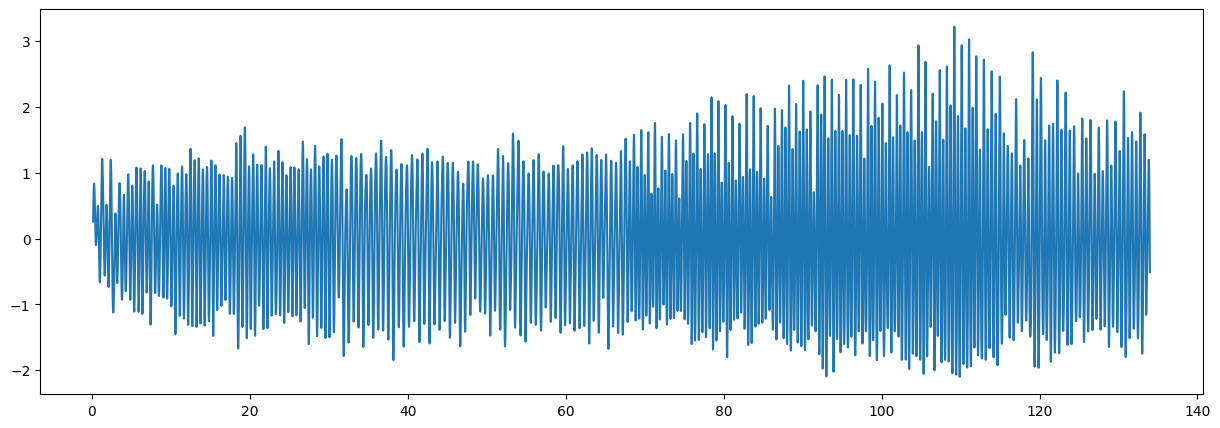

In [154]:
#Komponentti y
time = data2['seconds_elapsed']
noisy_signal = data2['y']
cutoff_H = 1/0.4 
cutoff_L = 1/5 
order = 2
dt = (time[len(time)-1 ] - time[1])/len(time) 
fs = 1/dt 
nyq = 0.5 * fs
lowpass_filtered = butter_lowpass_filter(noisy_signal, cutoff_L, fs, nyq, order)
highpass_filtered = butter_highpass_filter(noisy_signal, cutoff_H, fs, nyq, order)
clean_signal = noisy_signal -lowpass_filtered - highpass_filtered

plt.figure(figsize = (15,5))
plt.plot(time,clean_signal)

stepdata= clean_signal
steps = 0
for i in range(stepdata.shape[0]-1):
    if stepdata[i]/stepdata[i+1] < 0:
        steps = steps + 0.5
    print('Askelmäärä on ', steps)

Askelmäärä on  0
Askelmäärä on  0
Askelmäärä on  0
Askelmäärä on  0
Askelmäärä on  0
Askelmäärä on  0
Askelmäärä on  0
Askelmäärä on  0
Askelmäärä on  0
Askelmäärä on  0
Askelmäärä on  0
Askelmäärä on  0
Askelmäärä on  0
Askelmäärä on  0
Askelmäärä on  0
Askelmäärä on  0
Askelmäärä on  0
Askelmäärä on  0
Askelmäärä on  0
Askelmäärä on  0
Askelmäärä on  0
Askelmäärä on  0
Askelmäärä on  0
Askelmäärä on  0
Askelmäärä on  0
Askelmäärä on  0
Askelmäärä on  0
Askelmäärä on  0
Askelmäärä on  0
Askelmäärä on  0
Askelmäärä on  0
Askelmäärä on  0.5
Askelmäärä on  0.5
Askelmäärä on  0.5
Askelmäärä on  0.5
Askelmäärä on  0.5
Askelmäärä on  0.5
Askelmäärä on  0.5
Askelmäärä on  1.0
Askelmäärä on  1.0
Askelmäärä on  1.0
Askelmäärä on  1.0
Askelmäärä on  1.0
Askelmäärä on  1.0
Askelmäärä on  1.0
Askelmäärä on  1.0
Askelmäärä on  1.0
Askelmäärä on  1.0
Askelmäärä on  1.0
Askelmäärä on  1.0
Askelmäärä on  1.0
Askelmäärä on  1.0
Askelmäärä on  1.0
Askelmäärä on  1.0
Askelmäärä on  1.0
Askelmäärä on  1.

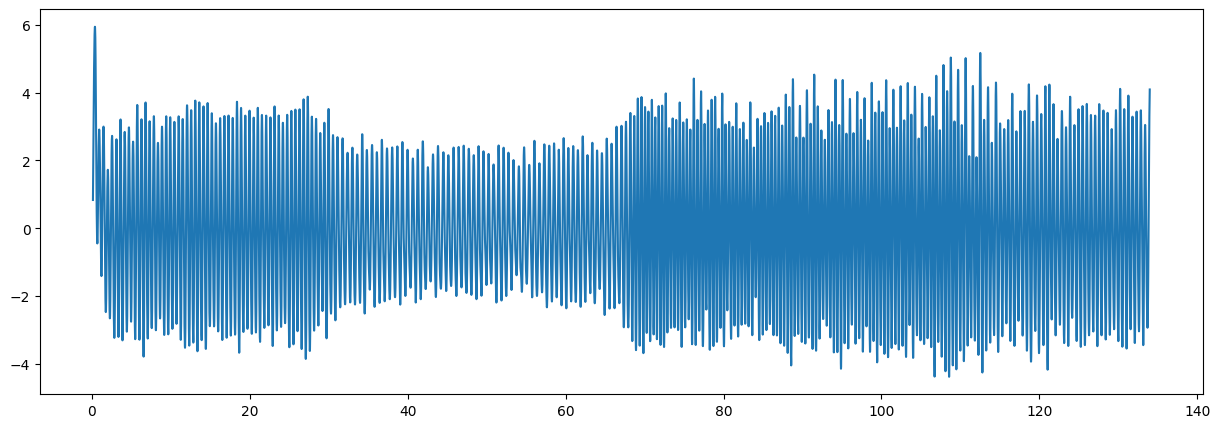

In [155]:
#Komponentti z
time = data2['seconds_elapsed']
noisy_signal = data2['z']
cutoff_H = 1/0.4 
cutoff_L = 1/5 
order = 2
dt = (time[len(time)-1 ] - time[1])/len(time) 
fs = 1/dt 
nyq = 0.5 * fs
lowpass_filtered = butter_lowpass_filter(noisy_signal, cutoff_L, fs, nyq, order)
highpass_filtered = butter_highpass_filter(noisy_signal, cutoff_H, fs, nyq, order)
clean_signal = noisy_signal -lowpass_filtered - highpass_filtered

plt.figure(figsize = (15,5))
plt.plot(time,clean_signal)

stepdata= clean_signal
steps = 0
for i in range(stepdata.shape[0]-1):
    if stepdata[i]/stepdata[i+1] < 0:
        steps = steps + 0.5
    print('Askelmäärä on ', steps)

In [156]:
#Huomataan että y ja z komponentit antavat saman askelmäärän mutta x komponentista saadaan poikkeava luku

#Otetaan kuitenkin suodatetun kiihtyvyysdatan kuvaaja z komponentista ja tulostetaan se vielä tähän

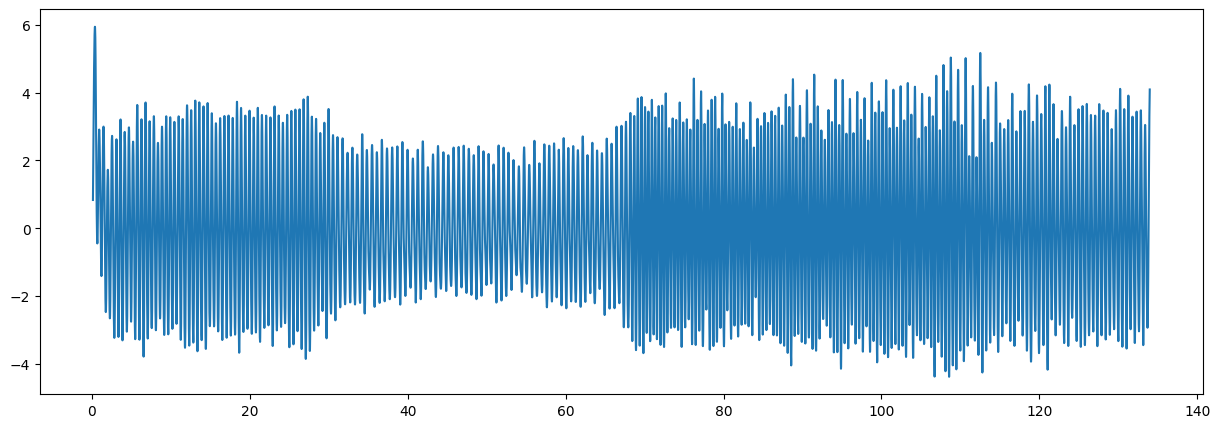

In [157]:
time = data2['seconds_elapsed']
noisy_signal = data2['z']
cutoff_H = 1/0.4 
cutoff_L = 1/5 
order = 2
dt = (time[len(time)-1 ] - time[1])/len(time) 
fs = 1/dt 
nyq = 0.5 * fs
lowpass_filtered = butter_lowpass_filter(noisy_signal, cutoff_L, fs, nyq, order)
highpass_filtered = butter_highpass_filter(noisy_signal, cutoff_H, fs, nyq, order)
clean_signal = noisy_signal -lowpass_filtered - highpass_filtered

plt.figure(figsize = (15,5))
plt.plot(time,clean_signal)

In [158]:
#Tehdään seuraavaksi tehospektri ja lasketaan sen perusteella askelmäärä

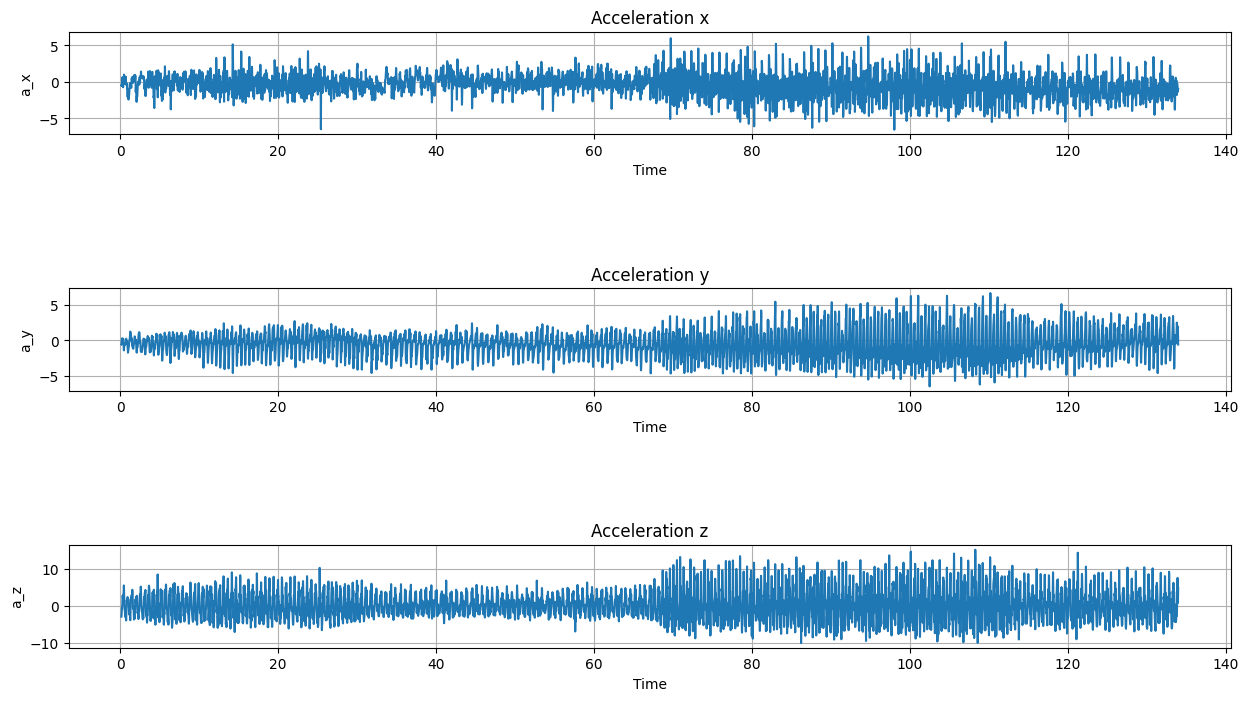

In [159]:
#Piirretään ensin joka komponentin kiihtyvyyden kuvaajat ja valitaan näistä selkein

plt.figure(figsize = (15,8))
plt.subplot(3,1,1)
plt.plot(data2['seconds_elapsed'],data2['x'])
plt.grid()
plt.title('Acceleration x')
plt.xlabel('Time')
plt.ylabel('a_x')

plt.subplot(3,1,2)
plt.plot(data2['seconds_elapsed'],data2['y'])
plt.grid()
plt.title('Acceleration y')
plt.xlabel('Time')
plt.ylabel('a_y')

plt.subplot(3,1,3)
plt.plot(data2['seconds_elapsed'],data2['z'])
plt.grid()
plt.title('Acceleration z')
plt.xlabel('Time')
plt.ylabel('a_z')

plt.subplots_adjust(hspace=1.5)
plt.show()

(0.0, 20.0, 0.0, 2500.0)

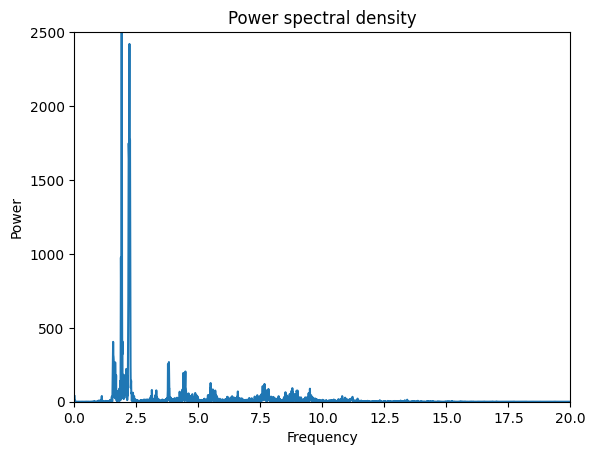

In [160]:
#Huomataan että z komponentin kiihtyvyys on selkein ja valitaan se tehospektriin

#Lasketaan tehospektri ja piirretään sen jälkeen kuvaaja

t = data2['seconds_elapsed']
f = data2['z']

def calculate_power_spectrum(f,t):
    dt = (t[len(t)-1] - t[0])/len(t)
    n = len(f)
    fft = np.fft.fft(f,n)
    PSD = fft*np.conj(fft)/n
    freq = 1/(dt*n)*np.arange(n)
    L = np.arange(1,np.floor(n/2),dtype = 'int')
    psd = np.array([freq[L],PSD[L].real])
    return psd

psd = calculate_power_spectrum(f,t)

T = t[len(t)-1] - t[0]

plt.plot(psd[0,:],psd[1,:])
plt.title('Power spectral density')
plt.ylabel('Power')
plt.xlabel('Frequency')
plt.axis([0,20,0, 2500])


In [161]:
#Lasketaan seuraavaksi askelmäärä numeroina tehospektrin avulla 

max_f = psd[0,np.argmax(psd[1,:])]
steps = T*max_f

print('Askelten määrä on ',np.round(steps, 0))

Askelten määrä on  255.0


Nopeudesta laskettu kiihtyvyys poikkeaa jonkin verran itse havaitusta kiihtyvyydestä, kun tutkitaan molempia kuvaajia. Laskettu kiihtyvyys on etenkin mittauksen alkuhetkinä hyvin erinlainen verrattuna havaittuun. Kuvaajien loppupuolet ovat enemmän toistensa kaltaisia. Erot voivat johtua esimerkiski siitä kuinka tarkkaan laskettu kiihtyvyys lasketaan ja miten havaittu data muodostetaan.

Askelmäärät molemmilla tyyleillä (suodatettu kiihtyvyydata, tehospektri) ovat mielestäni loogisia. Tuloksessa on vain yhden askeleen ero mikä ei ole mielestäni suuri.